###  1. mnist dataset, DT, LR, RF 추가로 작성

100.0%
100.0%
100.0%
100.0%


데이터 로드 완료
Train: (60000, 784), Test: (10000, 784)

Decision Tree 학습 중...
Decision Tree - Train Acc: 0.9950, Test Acc: 0.8818

Logistic Regression 학습 중...


c:\Users\luili\OneDrive\Desktop\개인폴더\Coding_Study\Machine_Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Train Acc: 0.9351, Test Acc: 0.9257

Random Forest 학습 중...
Random Forest - Train Acc: 0.9992, Test Acc: 0.9680


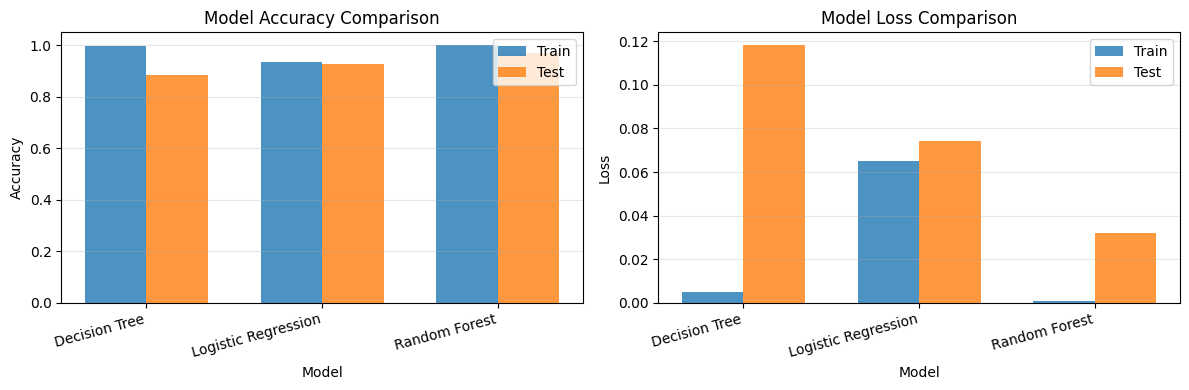


=== 최종 결과 ===
Decision Tree:
  Train Acc: 0.9950, Test Acc: 0.8818
Logistic Regression:
  Train Acc: 0.9351, Test Acc: 0.9257
Random Forest:
  Train Acc: 0.9992, Test Acc: 0.9680


In [1]:
# minst 데이터셋으로 DT, LR, RF

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터 로드
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 데이터를 numpy로 변환 (sklearn 모델용)
X_train = train_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_test = test_dataset.targets.numpy()

# 학습 속도를 위해 데이터 샘플링 
# X_train = X_train[:10000]
# y_train = y_train[:10000]

print("데이터 로드 완료")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# 모델 정의
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=20, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
}

results = {}

# 각 모델 학습 및 평가
for name, model in models.items():
    print(f"\n{name} 학습 중...")
    model.fit(X_train, y_train)

    # 예측
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # 정확도 계산
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    # Loss 계산 (cross-entropy approximation)
    # sklearn은 loss를 직접 제공하지 않으므로 근사값 사용
    train_loss = 1 - train_acc
    test_loss = 1 - test_acc

    results[name] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'train_loss': train_loss,
        'test_loss': test_loss
    }

    print(f"{name} - Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 정확도 그래프
ax1 = axes[0]
model_names = list(results.keys())
train_accs = [results[m]['train_acc'] for m in model_names]
test_accs = [results[m]['test_acc'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

ax1.bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
ax1.bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Loss 그래프
ax2 = axes[1]
train_losses = [results[m]['train_loss'] for m in model_names]
test_losses = [results[m]['test_loss'] for m in model_names]

ax2.bar(x - width/2, train_losses, width, label='Train', alpha=0.8)
ax2.bar(x + width/2, test_losses, width, label='Test', alpha=0.8)
ax2.set_xlabel('Model')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=15, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('mnist_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print("\n=== 최종 결과 ===")
for name, res in results.items():
    print(f"{name}:")
    print(f"  Train Acc: {res['train_acc']:.4f}, Test Acc: {res['test_acc']:.4f}")